In [1]:
import pandas as pd
import numpy as np

In [3]:
cornell_df = pd.read_csv("../cornell_movie/predictions.csv")
cornell_df = cornell_df.iloc[::-1]
cornell_df = cornell_df.drop(["Unnamed: 0", "speaker"], axis=1)
cornell_df = cornell_df.rename(columns={"utterance text": "text", "conversation_id": "conversation"})
cornell_df.insert(2, "source", "Cornell")

In [4]:
#iemocap

In [5]:
#ubuntu

In [6]:
#bolt

In [7]:
df = pd.concat([cornell_df])

In [9]:
df.to_csv("../model/data.csv", index=False)

### Visualization

In [2]:
df = pd.read_csv("../model/data.csv")

<Axes: >

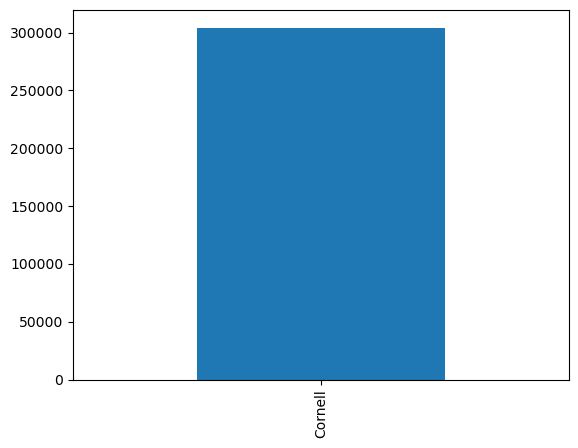

In [5]:
df['source'].value_counts().plot.bar()

In [52]:
val = 2

a = ((1/(1+np.exp(-df.iloc[:, 3:31][df['27'] < val])))).sum()
b = ((1/(1+np.exp(-df.iloc[:, 3:31][df['27'] > val])))).sum()

In [53]:
ab = pd.DataFrame({"a": a, "b": b})

<Axes: >

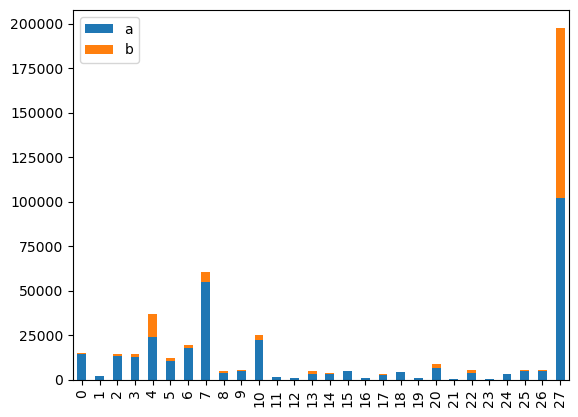

In [54]:
ab.plot.bar(stacked=True)

In [102]:
convs = df.groupby('conversation')

In [5]:
lens = convs['text'].count()

In [16]:
lens.sort_values()

conversation_id
L123443     1
L128080     1
L128739     1
L127966     1
L127956     1
           ..
L267558    54
L167261    55
L513247    56
L553902    59
L135360    89
Name: Unnamed: 0, Length: 83079, dtype: int64

<Axes: >

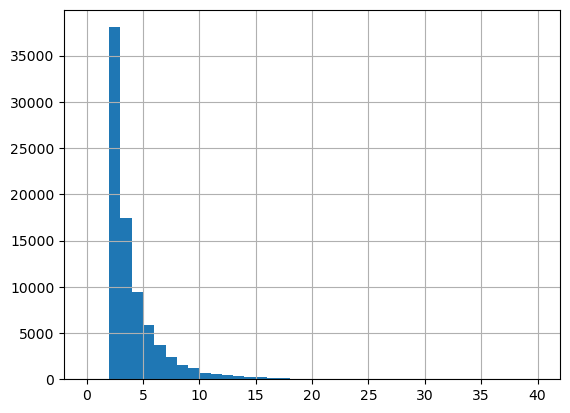

In [17]:
lens.hist(range=[0, 40], bins=40)